# **Import Libraries and modules**

<a href="https://colab.research.google.com/github/ksasi/EIP/blob/master/EIP4.0/Phase1/Session1%20-%20Assignments/1st_DNN_EIP4_0_TPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -V

Python 3.6.9


In [2]:
# https://keras.io/
#!pip install -q keras
#import keras

!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 21kB/s 
     |████████████████████████████████| 450kB 57.9MB/s 
     |████████████████████████████████| 3.8MB 18.3MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [3]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [0]:
tf.compat.v1.disable_eager_execution() ## https://github.com/tensorflow/tensorflow/issues/34235 and https://github.com/huan/tensorflow-handbook-tpu/issues/1 for TPU
#tf.compat.v1.enable_eager_execution()

### Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


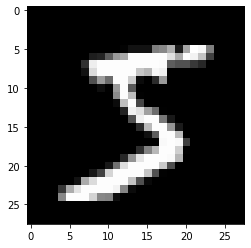

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap= 'gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28,28,1), use_bias = False))
  model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', use_bias = False))
  model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu', use_bias = False))
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 32, kernel_size=(1,1), activation = 'relu', use_bias = False))
  model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', use_bias = False))
  model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu', use_bias = False))
  model.add(Conv2D(filters = 10, kernel_size = (1, 1) , activation='relu', use_bias = False))
  model.add(Conv2D(filters = 10, kernel_size = (7, 7), use_bias = False))
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model


### Train on TPU

In [13]:
from tensorflow.keras.layers import Activation
import os

# TF 2.0
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_host(resolver.master())
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

with strategy.scope():
  model = create_model()
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


INFO:tensorflow:Initializing the TPU system: 10.67.219.170:8470
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Querying Tensorflow master (grpc://10.67.219.170:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 11925865320011982721)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 3586239208519057486)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 17672956336219123789)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 9960855556831727723)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/de

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        288       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18432     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73728     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4096      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          18432     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         7

In [15]:
model.fit(X_train.astype(np.float32), Y_train.astype(np.float32), batch_size=128, steps_per_epoch=468, epochs=15, validation_data = (X_test.astype(np.float32), Y_test.astype(np.float32)), verbose=1)

Epoch 1/15
468/468 [==============================] - 8s 18ms/step - loss: 0.2222 - accuracy: 0.9303 - val_loss: 0.0781 - val_accuracy: 0.9746
Epoch 2/15
468/468 [==============================] - 8s 18ms/step - loss: 0.0549 - accuracy: 0.9839 - val_loss: 0.0458 - val_accuracy: 0.9839
Epoch 3/15
468/468 [==============================] - 9s 19ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0383 - val_accuracy: 0.9868
Epoch 4/15
468/468 [==============================] - 10s 21ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0428 - val_accuracy: 0.9859
Epoch 5/15
468/468 [==============================] - 11s 24ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0321 - val_accuracy: 0.9883
Epoch 6/15
468/468 [==============================] - 12s 26ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0316 - val_accuracy: 0.9904
Epoch 7/15
468/468 [==============================] - 13s 29ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0369 - val_accuracy: 0.

In [0]:
model.save_weights('./mnist_classifier.h5', overwrite=True)

In [0]:
cpu_model = create_model()
cpu_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
cpu_model.load_weights('./mnist_classifier.h5')

In [26]:
cpu_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        288       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        18432     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 128)       73728     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 32)        4096      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 64)          18432     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 128)        

In [0]:
score = cpu_model.evaluate(X_test, Y_test, verbose=0)

In [21]:
print(score)

[0.04424815712437785, 0.9885]


In [0]:
y_pred = cpu_model.predict(X_test)

In [23]:
print(y_pred[:9])
print(y_test[:9])

[[4.60439826e-15 4.75713149e-11 2.32606157e-09 1.91525463e-12
  4.98859842e-11 5.91890848e-16 2.18637023e-21 1.00000000e+00
  7.53902285e-14 7.16853937e-11]
 [7.73940645e-09 1.15402186e-08 1.00000000e+00 3.42183378e-12
  1.43677736e-10 6.52965629e-15 1.60378280e-10 2.91214569e-14
  6.27187902e-09 2.13816374e-14]
 [1.96493624e-12 9.99999285e-01 2.11891879e-10 2.51141663e-10
  5.63126434e-07 1.31418814e-08 3.39372946e-10 5.98457603e-08
  2.04479740e-08 1.96018049e-10]
 [9.99999642e-01 1.68755909e-18 5.16540376e-14 2.10136338e-14
  7.09261955e-11 1.36464225e-14 5.52571877e-11 2.40818095e-15
  2.75422019e-10 3.30895773e-07]
 [1.35477775e-17 2.13920977e-16 3.00131305e-20 1.42269626e-16
  9.99999881e-01 5.56714628e-19 1.48757620e-15 7.83592615e-16
  1.02605277e-14 7.85404879e-08]
 [5.86781600e-13 9.99997854e-01 5.57631823e-11 1.12028388e-12
  9.41383917e-07 2.79698348e-11 4.98223338e-12 1.24524968e-06
  1.22351729e-09 6.28948144e-11]
 [3.69126280e-24 6.89367704e-12 1.07021058e-16 9.72418551e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

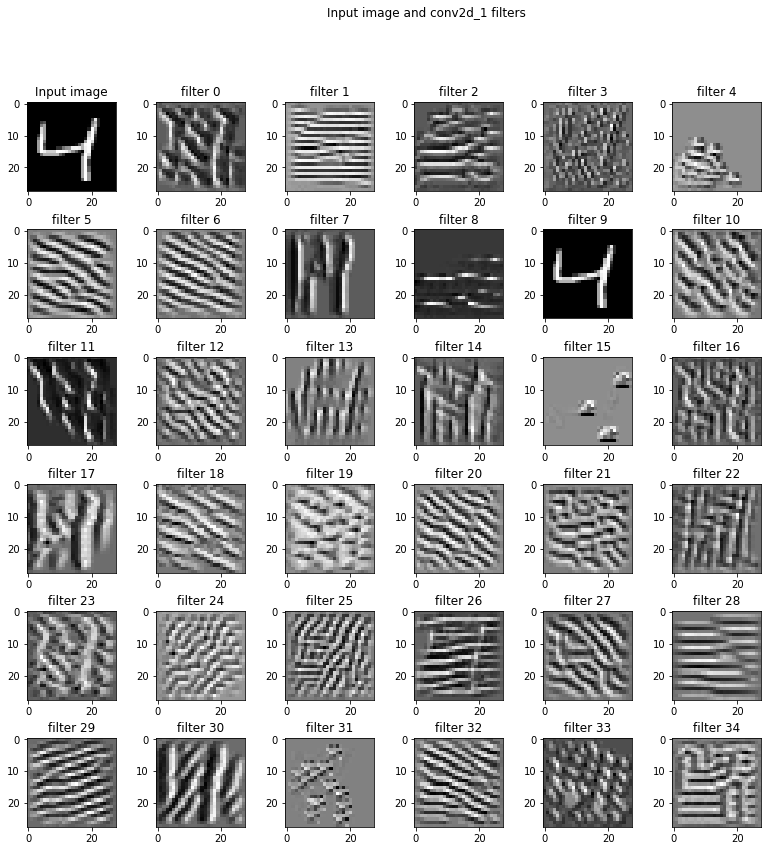

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()